In [1]:
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)
import plotly.graph_objects as go
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from plotly import tools
import seaborn as sns
import plotly as py
import pandas as pd
import numpy as np
import warnings
plt.style.use('fivethirtyeight')
warnings.filterwarnings("ignore")


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
data = pd.read_csv(r'C:\Users\berka\Google Drive\code\Data-Science---Artificial-Intelligence\Visualization\3. EDA Example\data.csv')
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
data['ShortPassing'].fillna(data['ShortPassing'].mean(), inplace = True)
data['Volleys'].fillna(data['Volleys'].mean(), inplace = True)
data['Dribbling'].fillna(data['Dribbling'].mean(), inplace = True)
data['Curve'].fillna(data['Curve'].mean(), inplace = True)
data['FKAccuracy'].fillna(data['FKAccuracy'], inplace = True)
data['LongPassing'].fillna(data['LongPassing'].mean(), inplace = True)
data['BallControl'].fillna(data['BallControl'].mean(), inplace = True)
data['HeadingAccuracy'].fillna(data['HeadingAccuracy'].mean(), inplace = True)
data['Finishing'].fillna(data['Finishing'].mean(), inplace = True)
data['Crossing'].fillna(data['Crossing'].mean(), inplace = True)
data['Weight'].fillna('200lbs', inplace = True)
data['Contract Valid Until'].fillna(2019, inplace = True)
data['Height'].fillna("5'11", inplace = True)
data['Loaned From'].fillna('None', inplace = True)
data['Joined'].fillna('Jul 1, 2018', inplace = True)
data['Jersey Number'].fillna(8, inplace = True)
data['Body Type'].fillna('Normal', inplace = True)
data['Position'].fillna('ST', inplace = True)
data['Club'].fillna('No Club', inplace = True)
data['Work Rate'].fillna('Medium/ Medium', inplace = True)
data['Skill Moves'].fillna(data['Skill Moves'].median(), inplace = True)
data['Weak Foot'].fillna(3, inplace = True)
data['Preferred Foot'].fillna('Right', inplace = True)
data['International Reputation'].fillna(1, inplace = True)
data['Wage'].fillna('€200K', inplace = True)
data.fillna(0, inplace = True)

In [4]:
def country(x):
    return data[np.logical_and(data['Nationality'] == x, data['Overall'] > 75)][['Name','Age','Overall','Potential','Position']]

def club(x):
    return data[data['Club'] == x][['Name','Jersey Number','Position','Overall','Nationality','Age','Wage',
                                    'Value','Contract Valid Until']]

In [5]:
country('Turkey')

,Name,Age,Overall,Potential,Position
383,O. Toprak,28,81,82,CB
449,H. Çalhanoğlu,24,80,84,CAM
659,C. Tosun,27,79,80,ST
705,N. Şahin,29,79,79,CDM
721,B. Yılmaz,32,79,79,ST
725,E. Belözoğlu,37,79,79,CM
853,O. Özyakup,25,78,81,RDM
908,E. Çolak,27,77,77,CAM
930,E. Akbaba,25,77,80,CAM
977,O. Kıvrak,30,77,77,GK


In [6]:
club('FC Barcelona')

,Name,Jersey Number,Position,Overall,Nationality,Age,Wage,Value,Contract Valid Until
0,L. Messi,10.0,RF,94,Argentina,31,€565K,€110.5M,2021
7,L. Suárez,9.0,RS,91,Uruguay,31,€455K,€80M,2021
18,M. ter Stegen,22.0,GK,89,Germany,26,€240K,€58M,2022
20,Sergio Busquets,5.0,CDM,89,Spain,29,€315K,€51.5M,2023
32,Coutinho,7.0,LW,88,Brazil,26,€340K,€69.5M,2023
42,S. Umtiti,23.0,CB,87,France,24,€205K,€57M,2023
49,Jordi Alba,18.0,LB,87,Spain,29,€250K,€38M,2020
53,I. Rakitić,4.0,RCM,87,Croatia,30,€260K,€46.5M,2021
54,Piqué,3.0,RCB,87,Spain,31,€240K,€34M,2022
96,A. Vidal,8.0,CAM,85,Chile,31,€205K,€26M,2021


In [7]:
def defending(data):
    return int(round((data[['Marking', 'StandingTackle', 
                               'SlidingTackle']].mean()).mean()))

def general(data):
    return int(round((data[['HeadingAccuracy', 'Dribbling', 'Curve', 
                               'BallControl']].mean()).mean()))

def mental(data):
    return int(round((data[['Aggression', 'Interceptions', 'Positioning', 
                               'Vision','Composure']].mean()).mean()))

def passing(data):
    return int(round((data[['Crossing', 'ShortPassing', 
                               'LongPassing']].mean()).mean()))

def mobility(data):
    return int(round((data[['Acceleration', 'SprintSpeed', 
                               'Agility','Reactions']].mean()).mean()))
def power(data):
    return int(round((data[['Balance', 'Jumping', 'Stamina', 
                               'Strength']].mean()).mean()))

def rating(data):
    return int(round((data[['Potential', 'Overall']].mean()).mean()))

def shooting(data):
    return int(round((data[['Finishing', 'Volleys', 'FKAccuracy', 
                               'ShotPower','LongShots', 'Penalties']].mean()).mean()))

data['Defending'] = data.apply(defending, axis = 1)
data['General'] = data.apply(general, axis = 1)
data['Mental'] = data.apply(mental, axis = 1)
data['Passing'] = data.apply(passing, axis = 1)
data['Mobility'] = data.apply(mobility, axis = 1)
data['Power'] = data.apply(power, axis = 1)
data['Rating'] = data.apply(rating, axis = 1)
data['Shooting'] = data.apply(shooting, axis = 1)

In [8]:
players = data[['Name','Overall','Defending','General','Mental','Passing',
                'Mobility','Power','Rating','Shooting','Flag','Age',
                'Nationality', 'Photo', 'Club']]

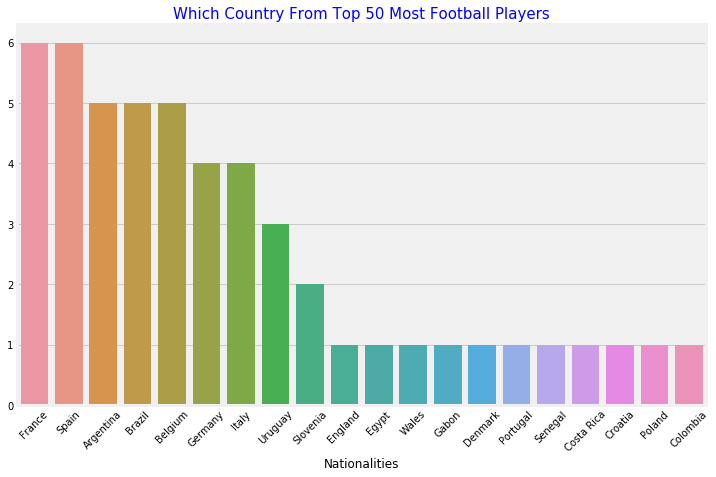

In [9]:
ntn = players.loc[:50,'Nationality'].value_counts()
plt.figure(figsize=(11,7))
sns.barplot(ntn.index, ntn.values)
plt.xlabel('Nationalities')
plt.xticks(rotation = 45)
plt.title('Which Country From Top 50 Most Football Players', color='blue', fontsize=15)
plt.show()

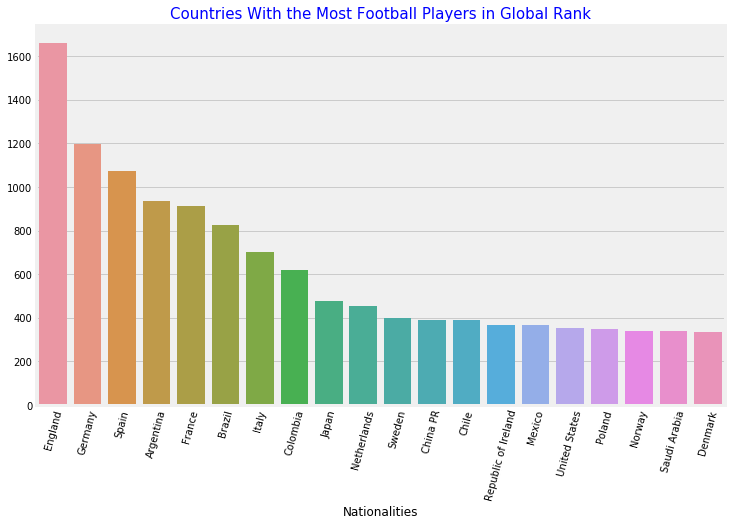

In [10]:
ntnall = players['Nationality'].value_counts()
plt.figure(figsize=(11,7))
sns.barplot(ntnall[:20].index, ntnall[:20].values)
plt.xlabel('Nationalities')
plt.xticks(rotation = 75)
plt.title('Countries With the Most Football Players in Global Rank', color='blue', fontsize=15)
plt.show()

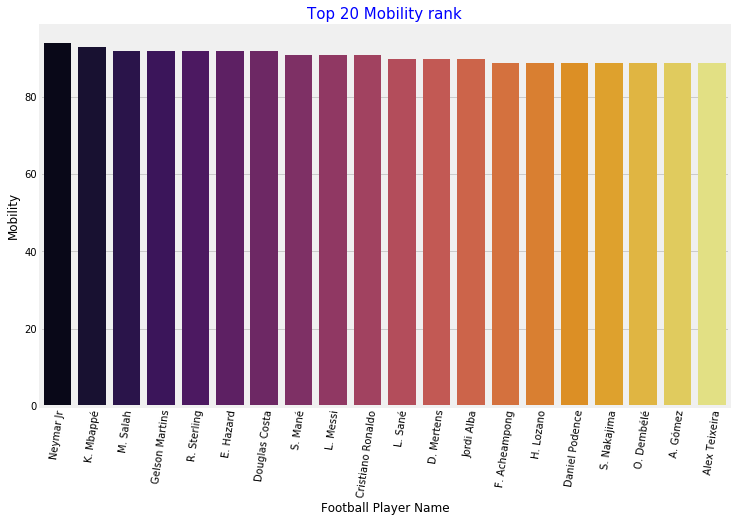

In [11]:
top20mob = players.sort_values('Mobility', ascending = False)[['Name','Mobility']].head(20)

plt.figure(figsize=(11,7))
sns.barplot(top20mob.Name,top20mob.Mobility,palette='inferno')
plt.xlabel('Football Player Name')
plt.xticks(rotation = 82)
plt.title('Top 20 Mobility rank', color='blue', fontsize=15)
plt.show()

In [12]:
df = players.iloc[:100,:]
bub_color = [float(each) for each in df.Overall]
bub_size = [float(each) for each in df.Age]
fig = go.Figure(
    data = [
        go.Scatter(
            x = df.Age,
            y = df.Overall,
            mode = "markers",
            marker = dict(
                color = bub_color,
                size = bub_size,
                showscale = True
            ),
            text= df.Name
        )
    ],
    layout = go.Layout(
        title = dict(text = "<b> Footballers' Age and Rating Colarationship </b>",
                     x = 0.5, y = 0.9,
                     font = dict(family = 'Italic',
                                 size = 20,
                                 color = 'Black')
                    ),
        xaxis = dict(title = dict(text = 'Age',
                                  font = dict(family = 'Italic',
                                              size = 20,
                                              color = 'Black')
                                 ),
                     ticklen = 5,
                     zeroline = False
                    ),
        yaxis = dict(title = dict(text = 'Overall Score',
                                  font = dict(family = 'Italic',
                                              size = 20,
                                              color = 'Black')
                                 ),
                     ticklen = 5,
                     zeroline = False
                    )
    )
)
iplot(fig)

In [13]:
trace1 = go.Scatter(
                    x = df.Age,
                    y = df.Overall,
                    mode = "markers",
                    name = "Rating",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text= df.Name
)

trace2 = go.Scatter(
                    x = df.Age,
                    y = df.Mental,
                    mode = "markers",
                    name = "Mental",
                    marker = dict(color = 'rgba(255, 112, 2, 0.8)'),
                    text= df.Name
)

data = [trace1, trace2]

layout = go.Layout(
    title = dict(text = "<b> Footballers' Overall and Mental by According To Their Age </b>",
                 x = 0.5, y = 0.9,
                 font = dict(family = 'Italic',
                             size = 20,
                             color = 'Black')
                ),
    xaxis = dict(title = dict(text = 'Age',
                              font = dict(family = 'Italic',
                                          size = 20,
                                          color = 'Black')
                             ),
                 ticklen = 5,
                 zeroline = False
                )
)
fig = dict(data=data, layout=layout)
iplot(fig)

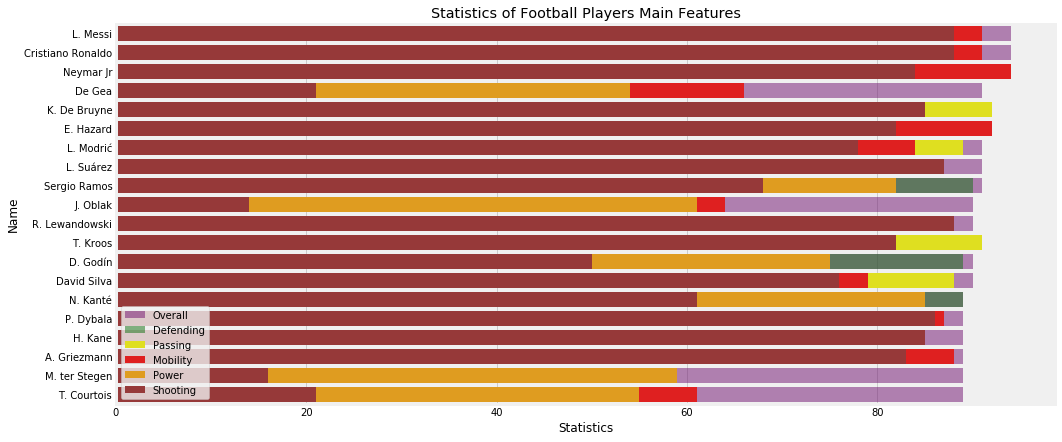

In [14]:
infostop20 = players[['Name','Overall','Defending','General','Mental','Passing','Mobility','Power','Rating','Shooting']].head(20)

f, ax = plt.subplots(figsize=(15,7))
sns.barplot(infostop20.Overall, infostop20.Name,color='purple',alpha = 0.5, label = 'Overall')
sns.barplot(infostop20.Defending, infostop20.Name,color='green',alpha = 0.5, label = 'Defending')
sns.barplot(infostop20.Passing, infostop20.Name,color='yellow', label = 'Passing')
sns.barplot(infostop20.Mobility, infostop20.Name,color='red', label = 'Mobility')
sns.barplot(infostop20.Power, infostop20.Name,color='orange', label = 'Power')
sns.barplot(infostop20.Shooting, infostop20.Name,color='brown', label = 'Shooting')
ax.legend(loc='lower left', frameon = True)
ax.set(xlabel = 'Statistics', ylabel='Name', title = "Statistics of Football Players Main Features")
plt.show()

In [15]:
ntn = players.loc[:50,'Club'].value_counts()
labels = ntn.index
size = ntn.values


fig = go.Figure(
    data = [
        dict(
            values = size,
            labels = labels,
            name = 'Rate',
            domain = dict(x = [1, 1], y = [1, 1]),
            hoverinfo = 'label+percent',
            hole = .3,
            type = 'pie'
        )
    ],
    layout = dict(
        title = dict(
            text = '<b> Which Club Plays Top 50 Footballer </b>',
            x = 0.25, y = .94,
            font = dict(
                family = 'Italic',
                size = 20,
                color = 'Black')
        ),
        annotations = [
            dict(
                font = dict(
                    size = 20,
                    family = 'Sherif',
                    color = 'Black'
                ),
                showarrow = False,
                text = 'Number of Footballers',
                x = .5, y = 1.1)
        ]
    )
)
iplot(fig)


In [16]:
top3 = players.iloc[:3]

trace1 = go.Bar(
                    x = top3.Name,
                    y = top3.Mobility,
                    name = 'Mobility',
                    marker = dict(color = 'rgba(144, 112, 2, 0.8)',
                                  line = dict(color='rgb(0,0,0)',
                                              width=1.5)
                                 ),
                    text = top3.Overall
)
                    
trace2 = go.Bar(
                    x = top3.Name,
                    y = top3.Power,
                    name = 'Power',
                    marker = dict(color = 'rgba(255, 112, 2, 0.8)',
                                  line = dict(color='rgb(0,0,0)',
                                              width=1.5)
                                 ),
                    text = top3.Overall 
)

data = [trace1, trace2]
layout = go.Layout(title = dict(text = '<b>Mobility and Power Points Best of 3 Footballers</b>',
                           x = 0.5, y = 0.9,
                           font = dict(family = 'Italic',
                                       size = 20,
                                       color = 'Black')
                          ),
              xaxis = dict(tickangle = 0),
              barmode = 'group'
             )
fig = go.Figure(data = data, layout = layout) 
iplot(fig)

In [17]:
trace1 = go.Bar(
    x = top3.Name,
    y = top3.Mental,
    name = 'Mental',
    marker = dict(color = 'rgba(125, 188, 50, 0.8)',
                  line = dict(color='rgb(0,0,0)',
                              width=1.5)
                 ),
    text = top3.Nationality 
)
                    
trace2 = go.Bar(
    x = top3.Name,
    y = top3.Shooting,
    name = 'Shooting',
    marker = dict(color = 'rgba(55, 22, 2, 0.8)',
                  line = dict(color='rgb(0,0,0)',
                              width=1.5)
                 ),
    text = top3.Nationality 
)

data = [trace1, trace2]
layout = go.Layout(
    title = dict(
        text = '<b>Mental and Shooting Points Best of 3 Footballers</b>',
        x = 0.5, y = 0.9,
        font = dict(
            family = 'Italic',
            size = 20,
            color = 'Black'
        )
    ),
    barmode = 'relative'
)
fig = go.Figure(data = data, layout = layout) 
iplot(fig)

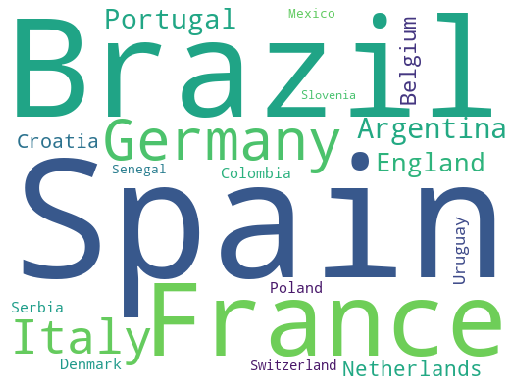

In [18]:
top50=players.Nationality[:500]
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
    background_color = 'white',
    max_font_size = 300,
    width=512,
    height=384,
    max_words=20
).generate(' '.join(top50))

plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()


In [20]:
trace0 = go.Box(
    y = players.Overall,
    name = 'Overall Score',
    marker = dict(color = 'rgba(111, 112, 2, 0.8)'),
    text = players.Name
)
trace1 = go.Box(
    y = players.Age,
    name = 'Age',
    marker = dict(color = 'rgba(244, 112, 2, 0.8)'),
    text = players.Name
)

data=[trace0, trace1]
iplot(data)

In [ ]:
top100 = players.iloc[:100]

trace1 = go.Scatter3d(
    x = top100.Overall,
    y = top100.General,
    z = top100.Mental,
    mode = 'markers',
    marker = dict(
        color = 'rgba(16, 112, 2, 0.8)',
        size = 7
    ),
    text= top100.Name
)
data = [trace1]
layout = go.Layout(
    margin = dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)